# Parte 1 _Analisi del Dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data = pd.concat([train, test], sort=False)
print(train.shape, test.shape, data.shape)

(2000, 21) (1000, 21) (3000, 22)


In [4]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1.0,NaN
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2.0,NaN
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2.0,NaN
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2.0,NaN
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,913,2121,14,8,15,1,1,0,NaN,996.0
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1632,1933,8,1,19,0,1,1,NaN,997.0
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,825,1223,5,0,14,1,0,0,NaN,998.0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,832,2509,15,11,6,0,1,0,NaN,999.0


Dataset is composed by 2000 instances.

# Search for a missing values

The isna() method returns a DataFrame of the same shape as the input, where each cell contains a boolean value indicating whether it is missing or not. The sum() method then adds up the number of True values for each column, resulting in a Series that contains the number of missing values for each column.

You can also use the isnull() method instead of isna(), which is an alias for isna() and has the same behavior.

Note that if your CSV file contains values that are not considered missing by Pandas (e.g., empty strings or whitespace), you may need to preprocess the data to convert these values to NaN values before using isna() or isnull().

We are going to check if there is some null values






In [5]:
from numpy import nan as NA

In [6]:
print(data.isnull(), data.isnull().sum())


     battery_power   blue  clock_speed  dual_sim     fc  four_g  int_memory  \
0            False  False        False     False  False   False       False   
1            False  False        False     False  False   False       False   
2            False  False        False     False  False   False       False   
3            False  False        False     False  False   False       False   
4            False  False        False     False  False   False       False   
..             ...    ...          ...       ...    ...     ...         ...   
995          False  False        False     False  False   False       False   
996          False  False        False     False  False   False       False   
997          False  False        False     False  False   False       False   
998          False  False        False     False  False   False       False   
999          False  False        False     False  False   False       False   

     m_dep  mobile_wt  n_cores  ...  px_width    ra

In [7]:
#to take out missing value having Na value 
data.notnull()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,id
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True
996,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True
997,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True
998,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True


There aren't missing value.


# Balanced classes for price_range.
First we can count the number of instances with price_range =1, 2, 3
If the number of elements for each class will be equal the classes are balanced.

In [8]:
class_ = train['price_range']
class_
class_.shape

(2000,)

In [9]:
pd.value_counts(class_)


1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

As we can see the classes are balaced because there is the same number of occurences for each of three classes of price range field.

In [10]:
#to take out missing value having Na value
print(train.shape)
train = train.dropna()
print(train.shape)

(2000, 21)
(2000, 21)


In [11]:
print(train['sc_w'])

0        7
1        3
2        2
3        8
4        2
        ..
1995     4
1996    10
1997     1
1998    10
1999     4
Name: sc_w, Length: 2000, dtype: int64


sw_c values are discete values, infact they are integer values.


In [12]:
#no of unique value in sc_w 
len(train['sc_w'].unique())

19

18
0


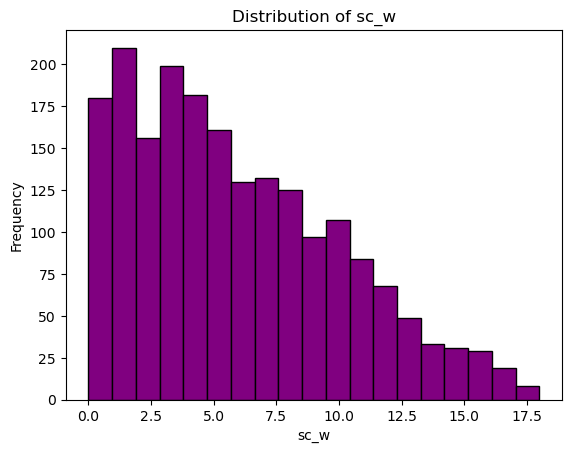

In [14]:
#Distribution of sc_w

max_value = train['sc_w'].max()
print(max_value)
min_value = train['sc_w'].min()
print(min_value)
sw_c_histogram = plt.hist(train['sc_w'], bins = len(train['sc_w'].unique()), range=(min_value, max_value), color='purple', edgecolor='black', linewidth=1)
plt.xlabel('sc_w')
plt.ylabel('Frequency')
plt.title('Distribution of sc_w')
plt.show()


# verificare  se  i  telefoni  costosi  hanno  mediamente una  dimensione  superiore  di  schermo. 


price_range
3    6.128
2    5.714
0    5.682
1    5.544
Name: sc_w, dtype: float64


Text(0.5, 1.0, 'Distribution of sc_w for price_range')

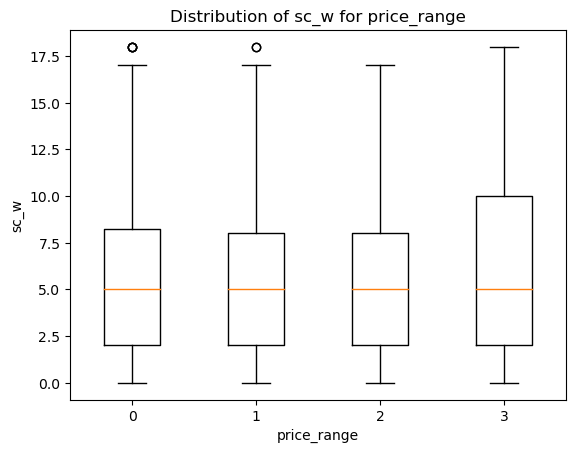

In [ ]:
sc_w_for_price_range = train.groupby('price_range')['sc_w']
print(sc_w_for_price_range.mean().sort_values(ascending=False))
plt.boxplot([sc_w_for_price_range.get_group(0), sc_w_for_price_range.get_group(1), sc_w_for_price_range.get_group(2), sc_w_for_price_range.get_group(3)], labels=['0', '1', '2', '3'])
plt.xlabel('price_range')
plt.ylabel('sc_w')
plt.title('Distribution of sc_w for price_range')


In [ ]:
#Verificare se eliminando gli elementi con sc_w uguale a 0 il risultato cambia. 
new_train = train.loc[train['sc_w'] != 0]
print(new_train.shape, train.shape)
new_sc_w_for_price_range = new_train.groupby('price_range')['sc_w'].mean()
print(new_sc_w_for_price_range.sort_values(ascending=False))



(1820, 21) (2000, 21)
price_range
3    6.646421
0    6.299335
2    6.265351
1    6.132743
Name: sc_w, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x1decfd80ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1decfd811e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1decfd80a00>,
 'medians': [<matplotlib.lines.Line2D at 0x1decfd81600>,
 'fliers': [<matplotlib.lines.Line2D at 0x1decfd818a0>,
 'means': []}

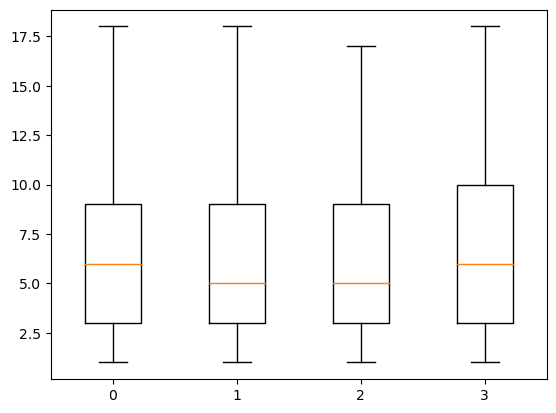

In [ ]:
plt.boxplot([new_train['sc_w'].loc[new_train['price_range'] == 0], new_train['sc_w'].loc[new_train['price_range'] == 1], new_train['sc_w'].loc[new_train['price_range'] == 2], new_train['sc_w'].loc[new_train['price_range'] == 3]], labels=['0', '1', '2', '3'])


I telefoni di fascia 3 e 0 sono quello con lo schermo mediamente più grande, mentre quelli di fascia 1 e 2 hanno uno schermo più piccolo.
Questo andamento dimostra come i telefoni più costosi non è detto che siano quelli con lo schermo più grande, ma si può dedurre solamente che la grandezza dello schermo è un fattore che influenza il prezzo del telefono.
Anche nel caso si vadano a togliere dal dataset quei casi in cui lo schermo è di dimensioni 0, l'andamento medio rimane lo stesso. 


3.  E’ vero che mediamente i telefoni meno costosi hanno anche una batteria meno potente? 
Realizzare 4 istogrammi (uno per ogni valore di price_range) che rappresentino la distribuzione 
dei valori di battery power per ogni categoria.

In [ ]:
train_for_price_range = train.groupby('price_range')['battery_power']
print((train_for_price_range.mean()))



price_range
0    1116.902
1    1228.868
2    1228.320
3    1379.984
Name: battery_power, dtype: float64


per fare un istogramma per ogn classe di price_range, bisogna prima filtrare il dataset per ogni classe di price_range e poi fare l'istogramma.

In [ ]:
price_0 = train.loc[train['price_range'] == 0]
print('battery range for price 0:', price_0['battery_power'].min(), price_0['battery_power'].max())
price_1 = train.loc[train['price_range'] == 1]
#price_1['battery_power']
print('battery range for price 1:', price_1['battery_power'].min(), price_1['battery_power'].max())   
price_2 = train.loc[train['price_range'] == 2]
print('battery range for price 2:', price_2['battery_power'].min(), price_2['battery_power'].max())
price_3 = train.loc[train['price_range'] == 3]
print('battery range for price 3:', price_3['battery_power'].min(), price_3['battery_power'].max())


battery range for price 0: 503 1994
battery range for price 1: 501 1996
battery range for price 2: 501 1998
battery range for price 3: 503 1994


Text(0.5, 1.0, 'Distribution of battery_power for price_range high')

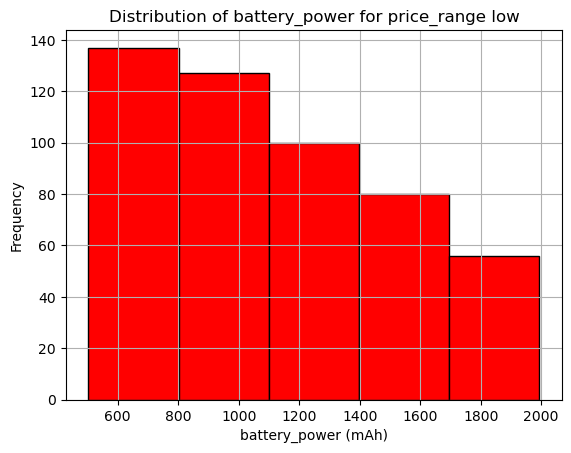

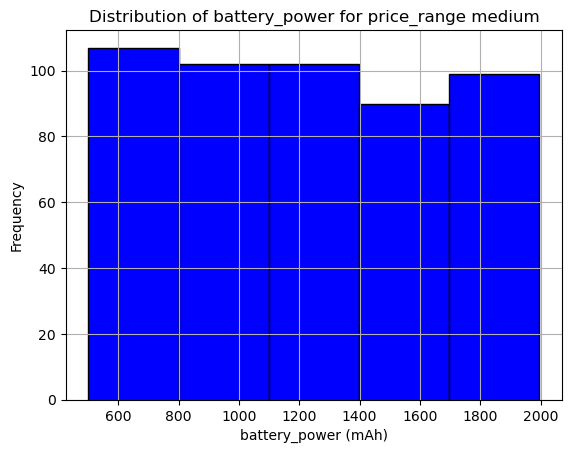

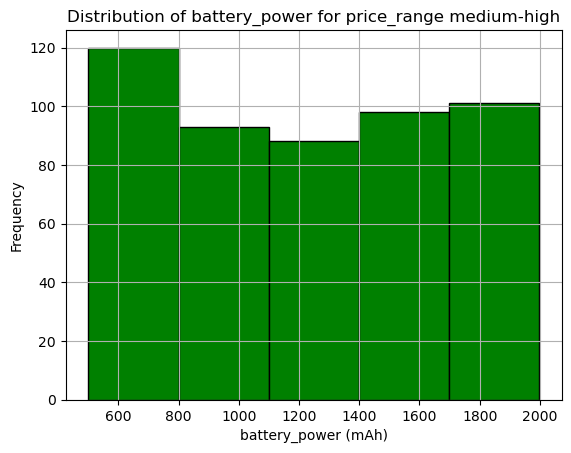

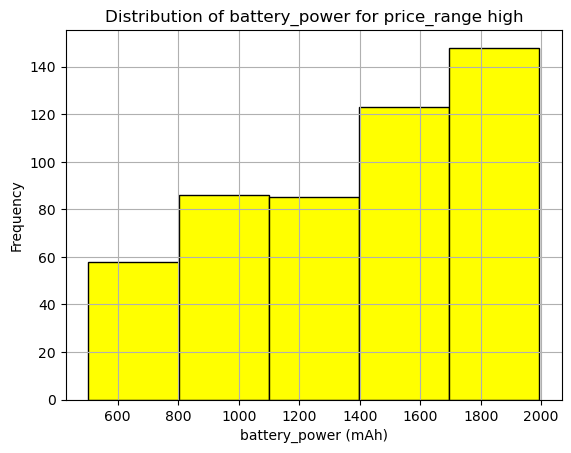

In [ ]:

price_0.hist(column='battery_power', bins=5, color='red', edgecolor='black', linewidth=1)
plt.xlabel('battery_power (mAh)')
plt.ylabel('Frequency')
plt.title('Distribution of battery_power for price_range low')
price_1.hist(column='battery_power', bins=5, color='blue', edgecolor='black', linewidth=1)
plt.xlabel('battery_power (mAh)')
plt.ylabel('Frequency')
plt.title('Distribution of battery_power for price_range medium')
price_2.hist(column='battery_power', bins=5, color='green', edgecolor='black', linewidth=1)
plt.xlabel('battery_power (mAh)')
plt.ylabel('Frequency')
plt.title('Distribution of battery_power for price_range medium-high')
price_3.hist(column='battery_power', bins=5, color='yellow', edgecolor='black', linewidth=1)
plt.xlabel('battery_power (mAh)')
plt.ylabel('Frequency')
plt.title('Distribution of battery_power for price_range high')

Mean battery power for each price range class above.

<Axes: xlabel='price_range'>

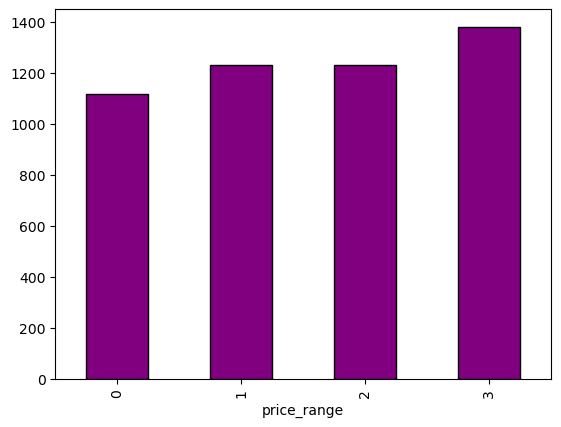

In [ ]:
a = train.groupby('price_range')['battery_power'].mean()
a.plot(kind='bar', color='purple' ,edgecolor='black', linewidth=1)


C'è correlazione fra la fascia di prezzo del telefono e la potenza della batteria.
Vediamo dai grafici che in media all'amentare della potenza della batteria aumenta anche il prezzo del telefono.


4) Verificare se tutti i telefoni che hanno il 4G hanno anche il 3G

In [ ]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
# print('fra tutti il telefoni che hanno il 3g quanti hanno il 4g ?')
print('1) telefoni con il 3g e il 4g;')
print('0) telefoni con 3g senza 4g:')
print(train['four_g'].loc[train['three_g'] == 1].value_counts())
print('tutti i telefoni con 4g e 3g')
print(train['three_g'].loc[train['four_g'] == 1].value_counts())
print('tutti i telefoni con 4g e senza 3g')
print(train['four_g'].loc[train['three_g'] == 0].value_counts())




1) telefoni con il 3g e il 4g;
0) telefoni con 3g senza 4g:
1    1043
0     480
Name: four_g, dtype: int64
tutti i telefoni con 4g e 3g
1    1043
Name: three_g, dtype: int64
tutti i telefoni con 4g e senza 3g
0    477
Name: four_g, dtype: int64


5. Quanti sono i telefoni 4G che non hanno wifi e bluetooth?

In [ ]:
train.loc[(train['four_g'] == 1) & (train['wifi'] == 0) & (train['blue'] == 0)].shape   

(263, 21)

263 telefoni 4G non hanno wifi e bluetooth.

# Parte 2: Trasformazione e Predizione (20 punti)

1) Si vuole predire il valore di price_range sulla base degli attributi presenti nel dataset. 
Dividere il dataset in modo che 3/4 degli elementi siano contenuti in un nuovo dataset “train” e 
1/4 nel dataset “test

In [ ]:
import sklearn as sk
from sklearn.model_selection import train_test_split


In [ ]:
#per togliere dal dataframe la colonna price_range che raprresenta la classe da stimare e non una feature
dataset = train.drop(columns=['price_range'])
# equivalentemente
# dataset =  train.drop(['price_range', axis=1])
dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset, class_, test_size=0.25)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1500, 20), (500, 20), (1500,), (500,))

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
print('Accuracy su training set: ', accuracy_score(y_train, y_train_pred))
print('Confusion matrix: \n', confusion_matrix(y_train, y_train_pred))
y_pred = tree.predict(X_test)
# print(y_pred)
# print(y_test.values)
print('Accuracy su test set: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))




Accuracy su training set:  1.0
Confusion matrix: 
 [[373   0   0   0]
 [  0 377   0   0]
 [  0   0 373   0]
 [  0   0   0 377]]
Accuracy su test set:  0.788
Confusion matrix: 
 [[110  17   0   0]
 [ 15  86  22   0]
 [  0  19  90  18]
 [  0   0  15 108]]


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



In [ ]:
classes = class_.unique()
print(classes)

[1 2 3 0]


Confusion matrix, without normalization
[[110  17   0   0]
 [ 15  86  22   0]
 [  0  19  90  18]
 [  0   0  15 108]]
Normalized confusion matrix
[[0.87 0.13 0.   0.  ]
 [0.12 0.7  0.18 0.  ]
 [0.   0.15 0.71 0.14]
 [0.   0.   0.12 0.88]]


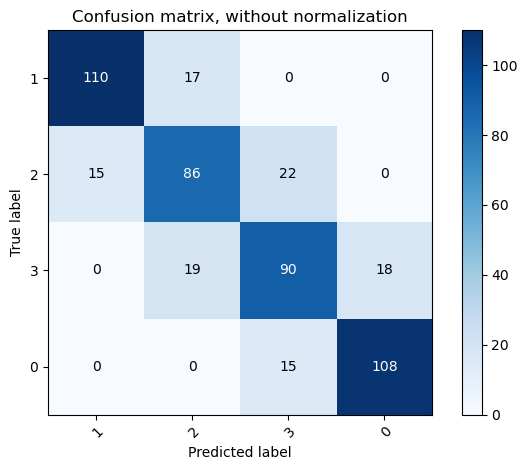

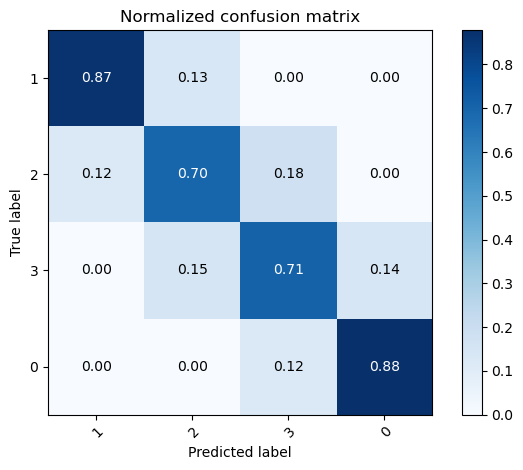

In [ ]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes = classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

da usare logistic regression